In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Info Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### `1` No Null Value In Any Columns

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### `1` Mean Value In `TAX` and `B` Very High Compared Another Columns, So We Need To Set Data In Same Range
#### `2` Some Column Is Sekwed Like `CRIM` , `ZN`, `INDUS` , `AGE`, `RAD`, `TAX`, `B` 
#### `3` Some Columns Follow Normal Distributions like, `NOX`, `RM` , `DIS`,  `PTRATIO` , `LSTAT` , `MEDV`

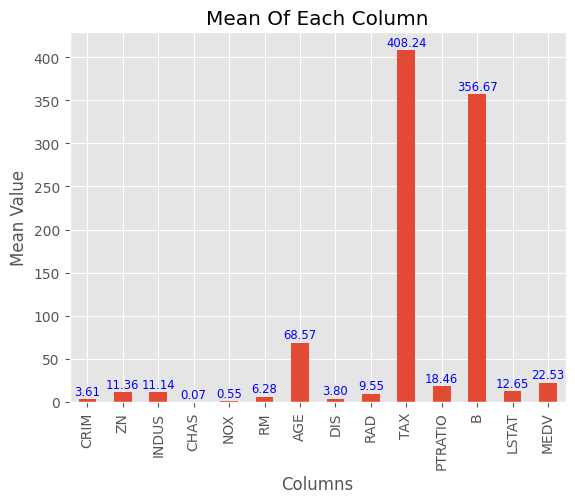

In [6]:
# plot mean of each columns
plt.style.use('ggplot')
df_means = data.describe().loc['mean']
df_means.plot.bar()
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.title('Mean Of Each Column')
for x in enumerate(df_means.index):
    plt.text(x[0], df_means.iloc[x[0]] + 5, f'{df_means.iloc[x[0]]:0.2f}', ha = 'center', fontsize = 'small', color = 'b')

## Check Correlation And Multi Colinearity

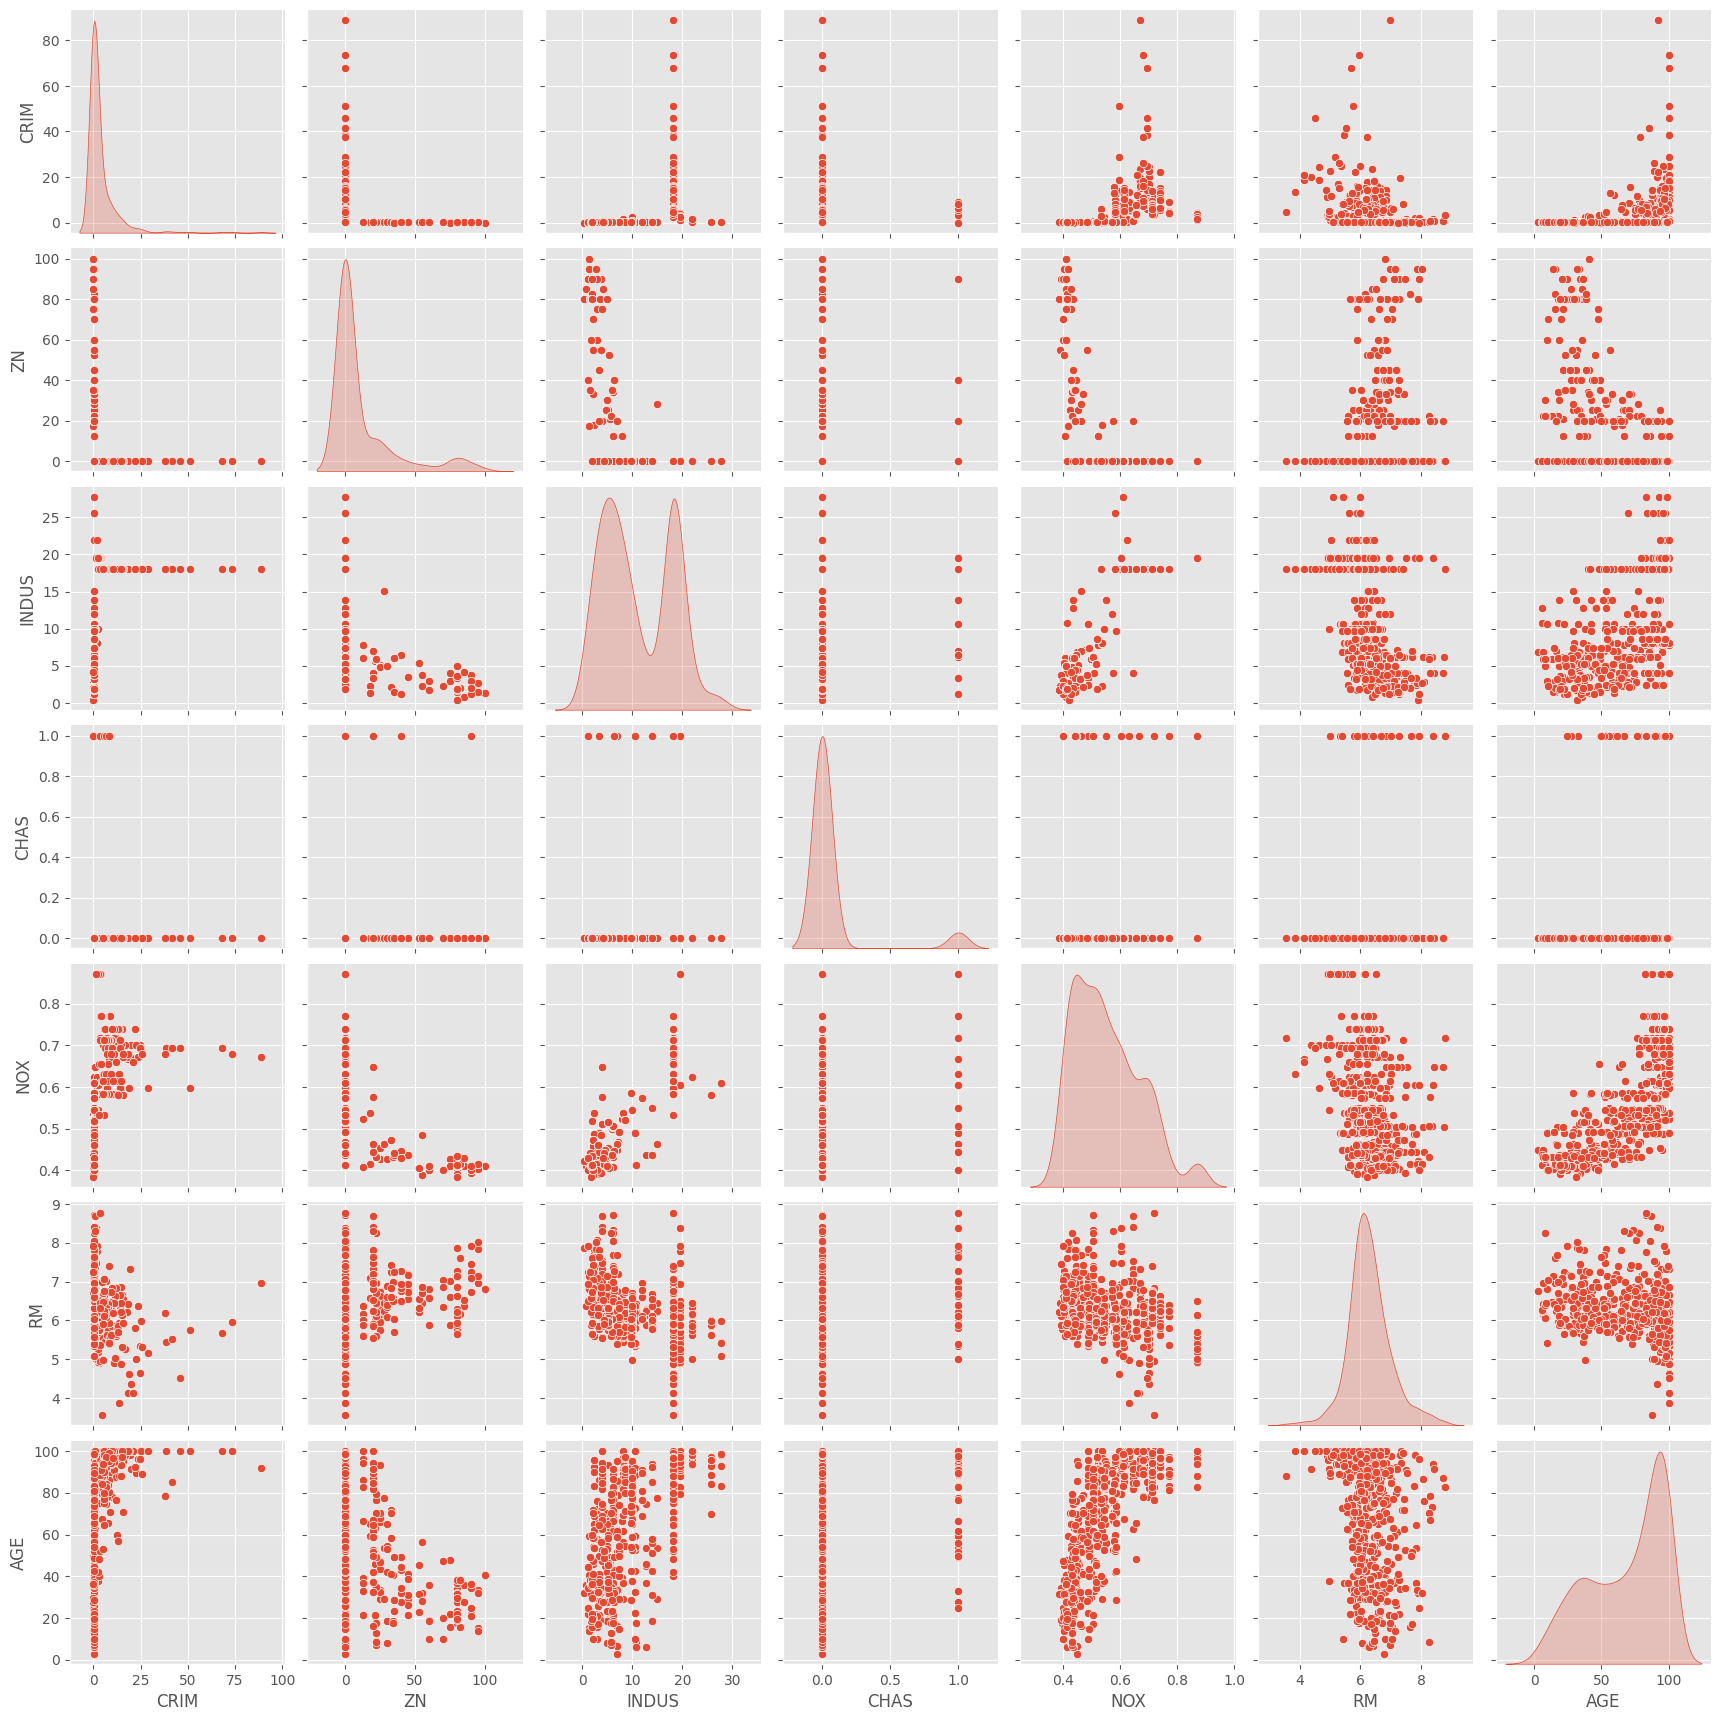

In [7]:
sns.pairplot(data.iloc[:, np.hstack(([0], range(1, 7)))], diag_kind='kde')

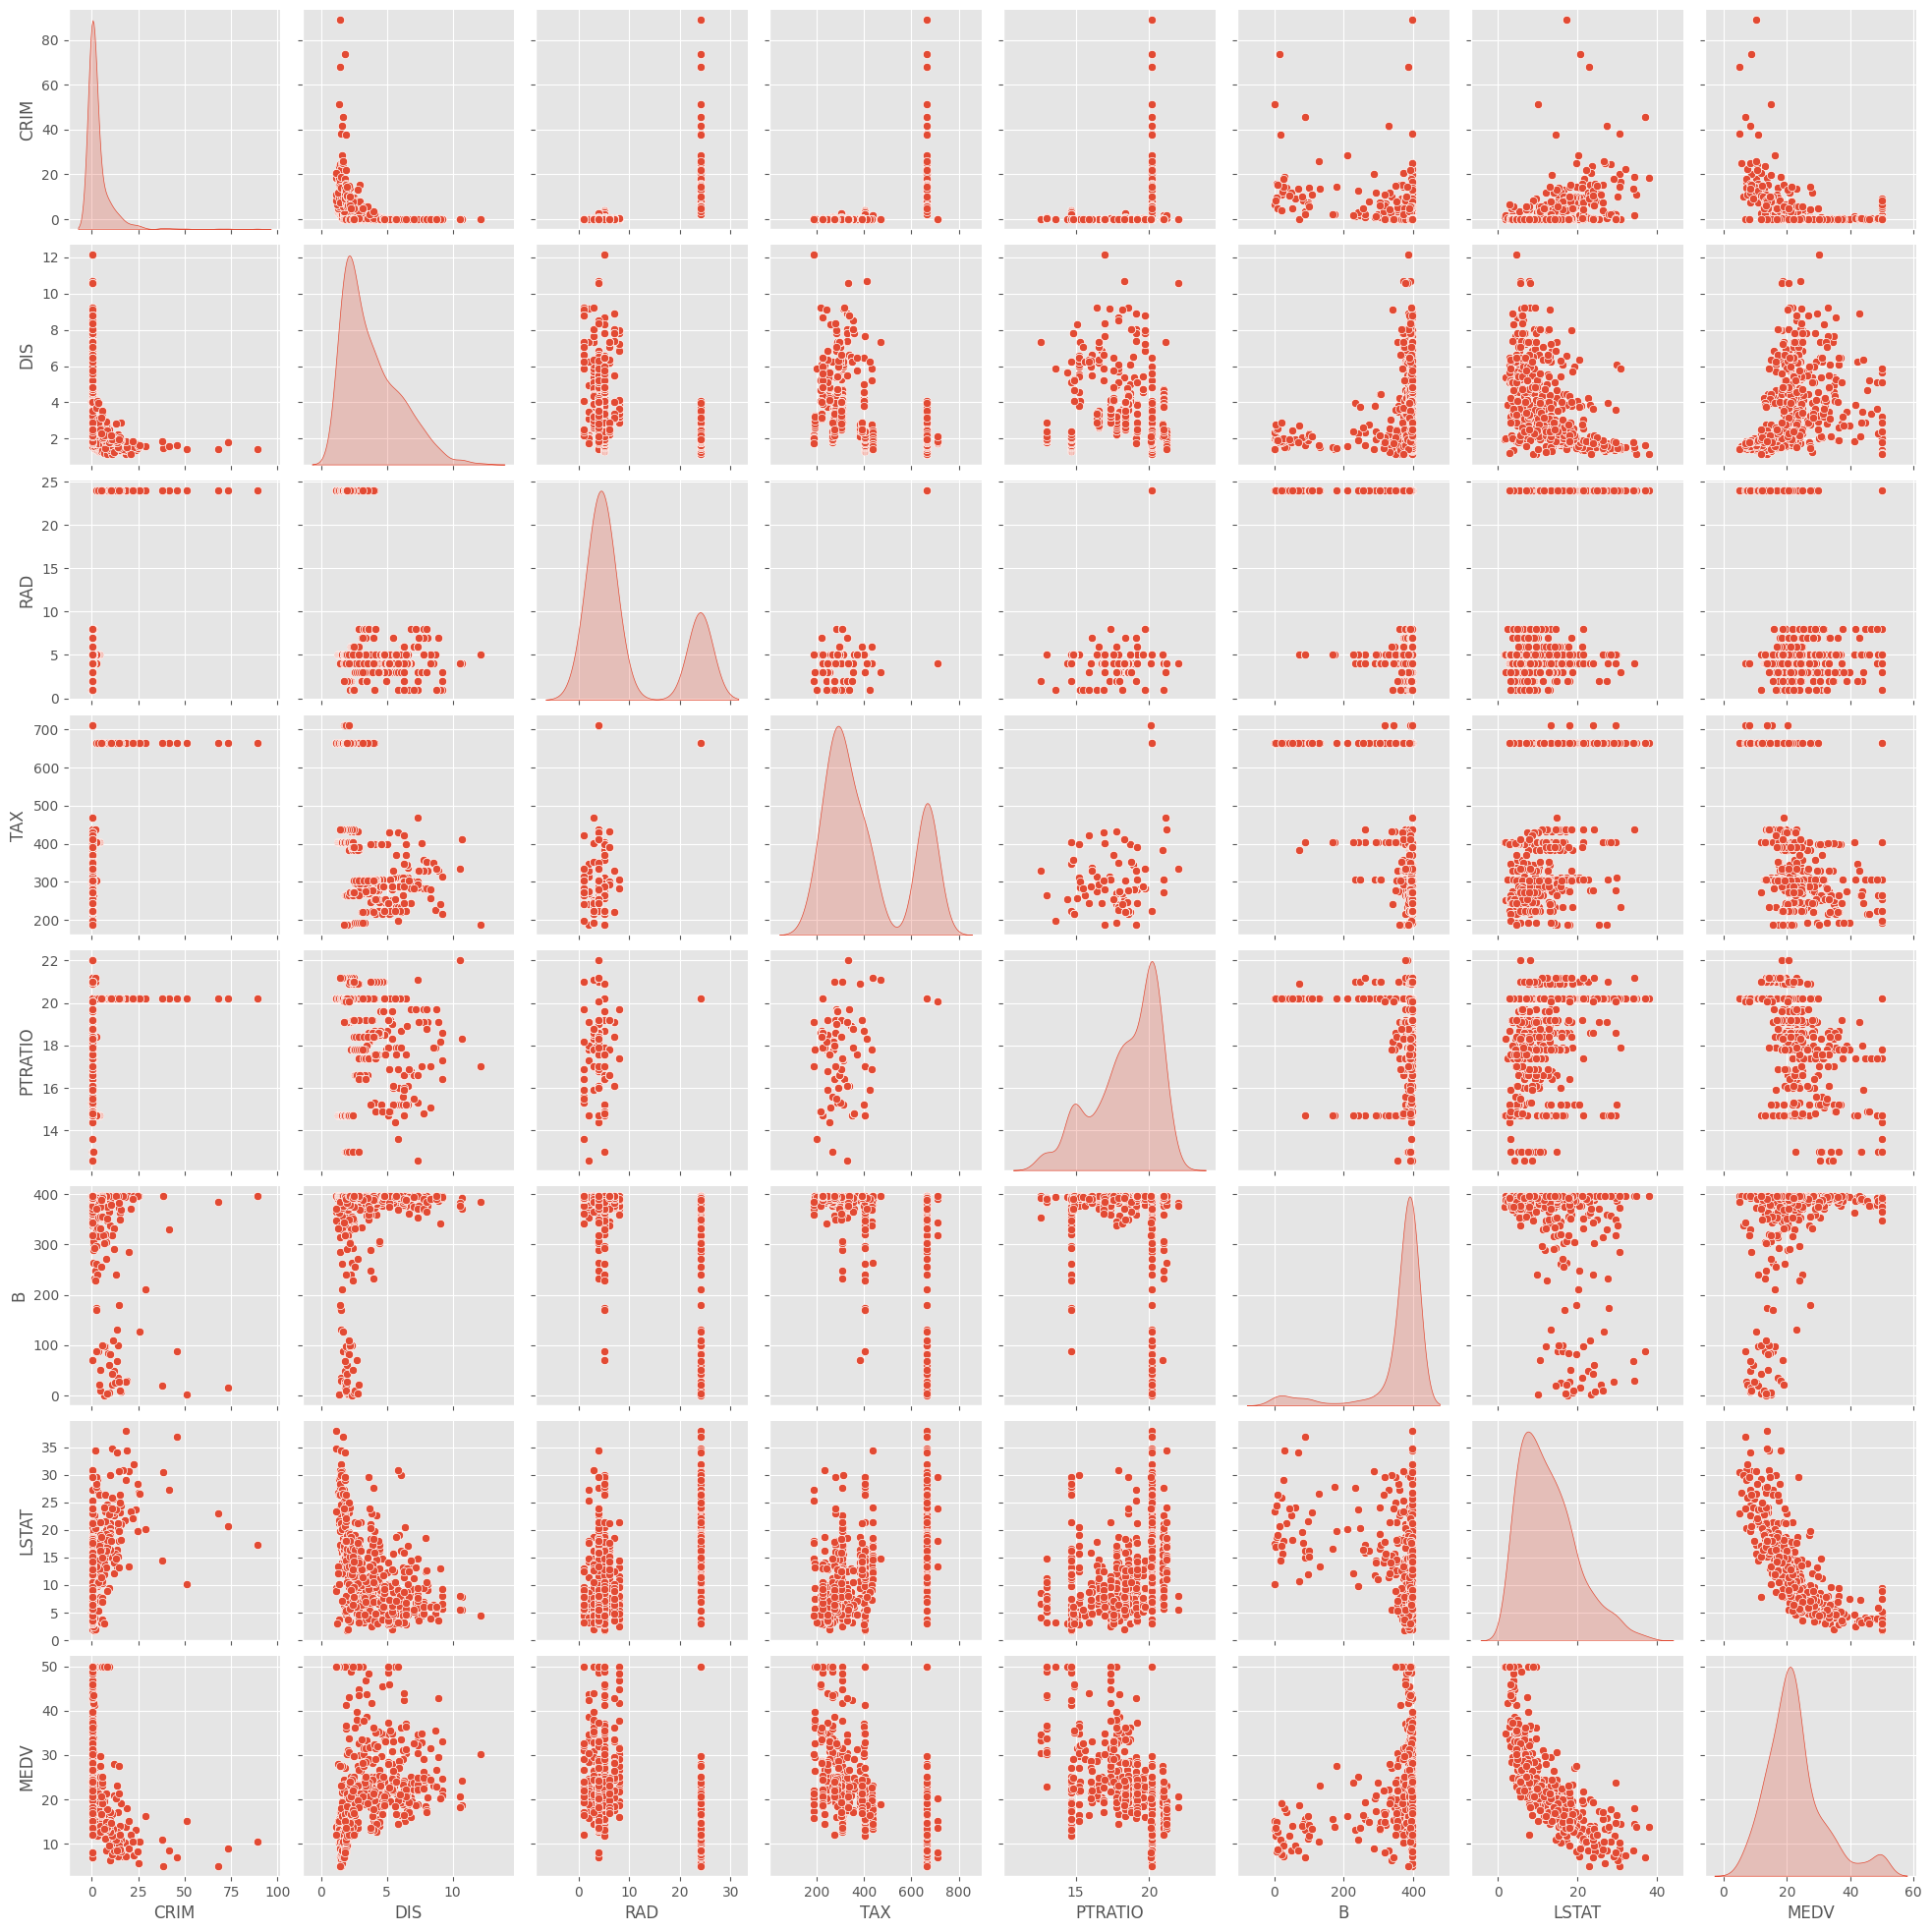

In [8]:
sns.pairplot(data.iloc[:, np.hstack(([0], range(7, 14)))], diag_kind='kde')

## Distribution Plot

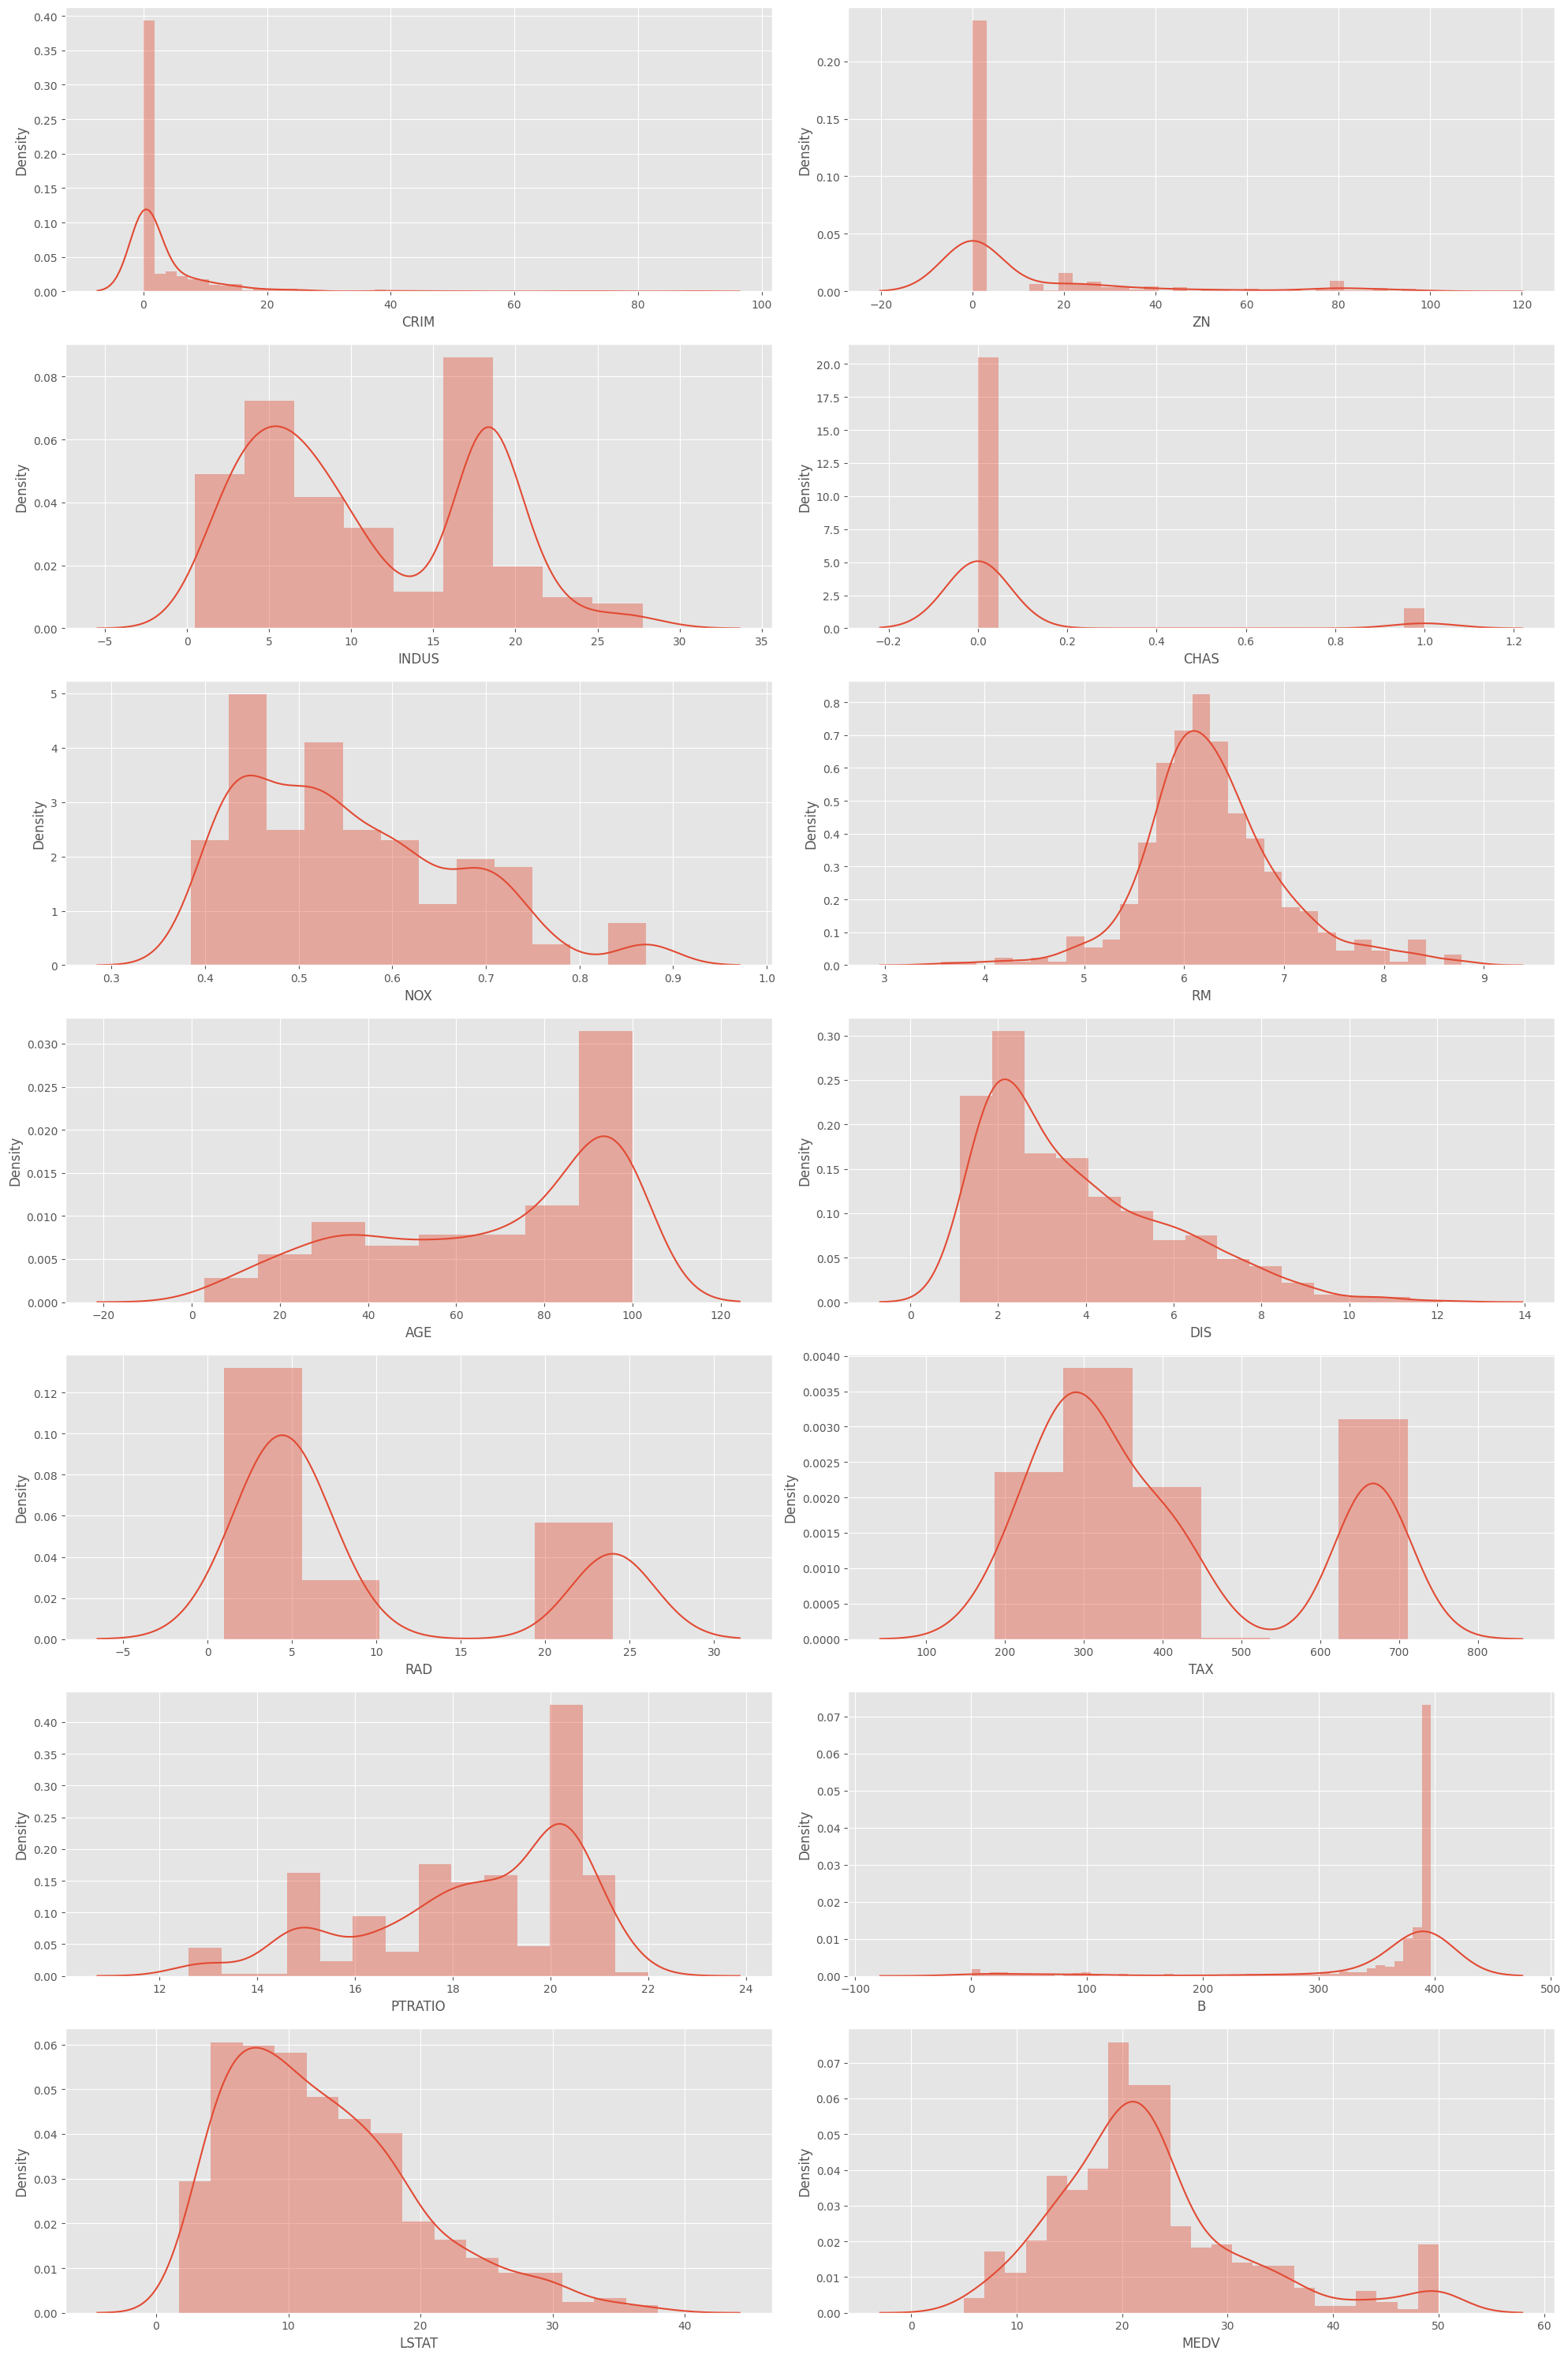

In [9]:
nrows = 7
ncols = 2

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = (20, 30))
index = 0
col = data.columns
for i in range(nrows):
    for j in range(ncols):
        sns.distplot(data[col[index]], ax = ax[i, j])
        index += 1
plt.tight_layout()

#### `1` `CRIM`, `ZN`, `CHAS`, `AGE`, `DIS`, `B` is skewed  
#### `2` `RM` Normal Distribution
#### `3` `MEDV` Mostly Normal Distribution
#### `4` `INDUS`, `RAD`, `TAX` Can Seperate Two Group

## Check Correlation with price 'MEDV'

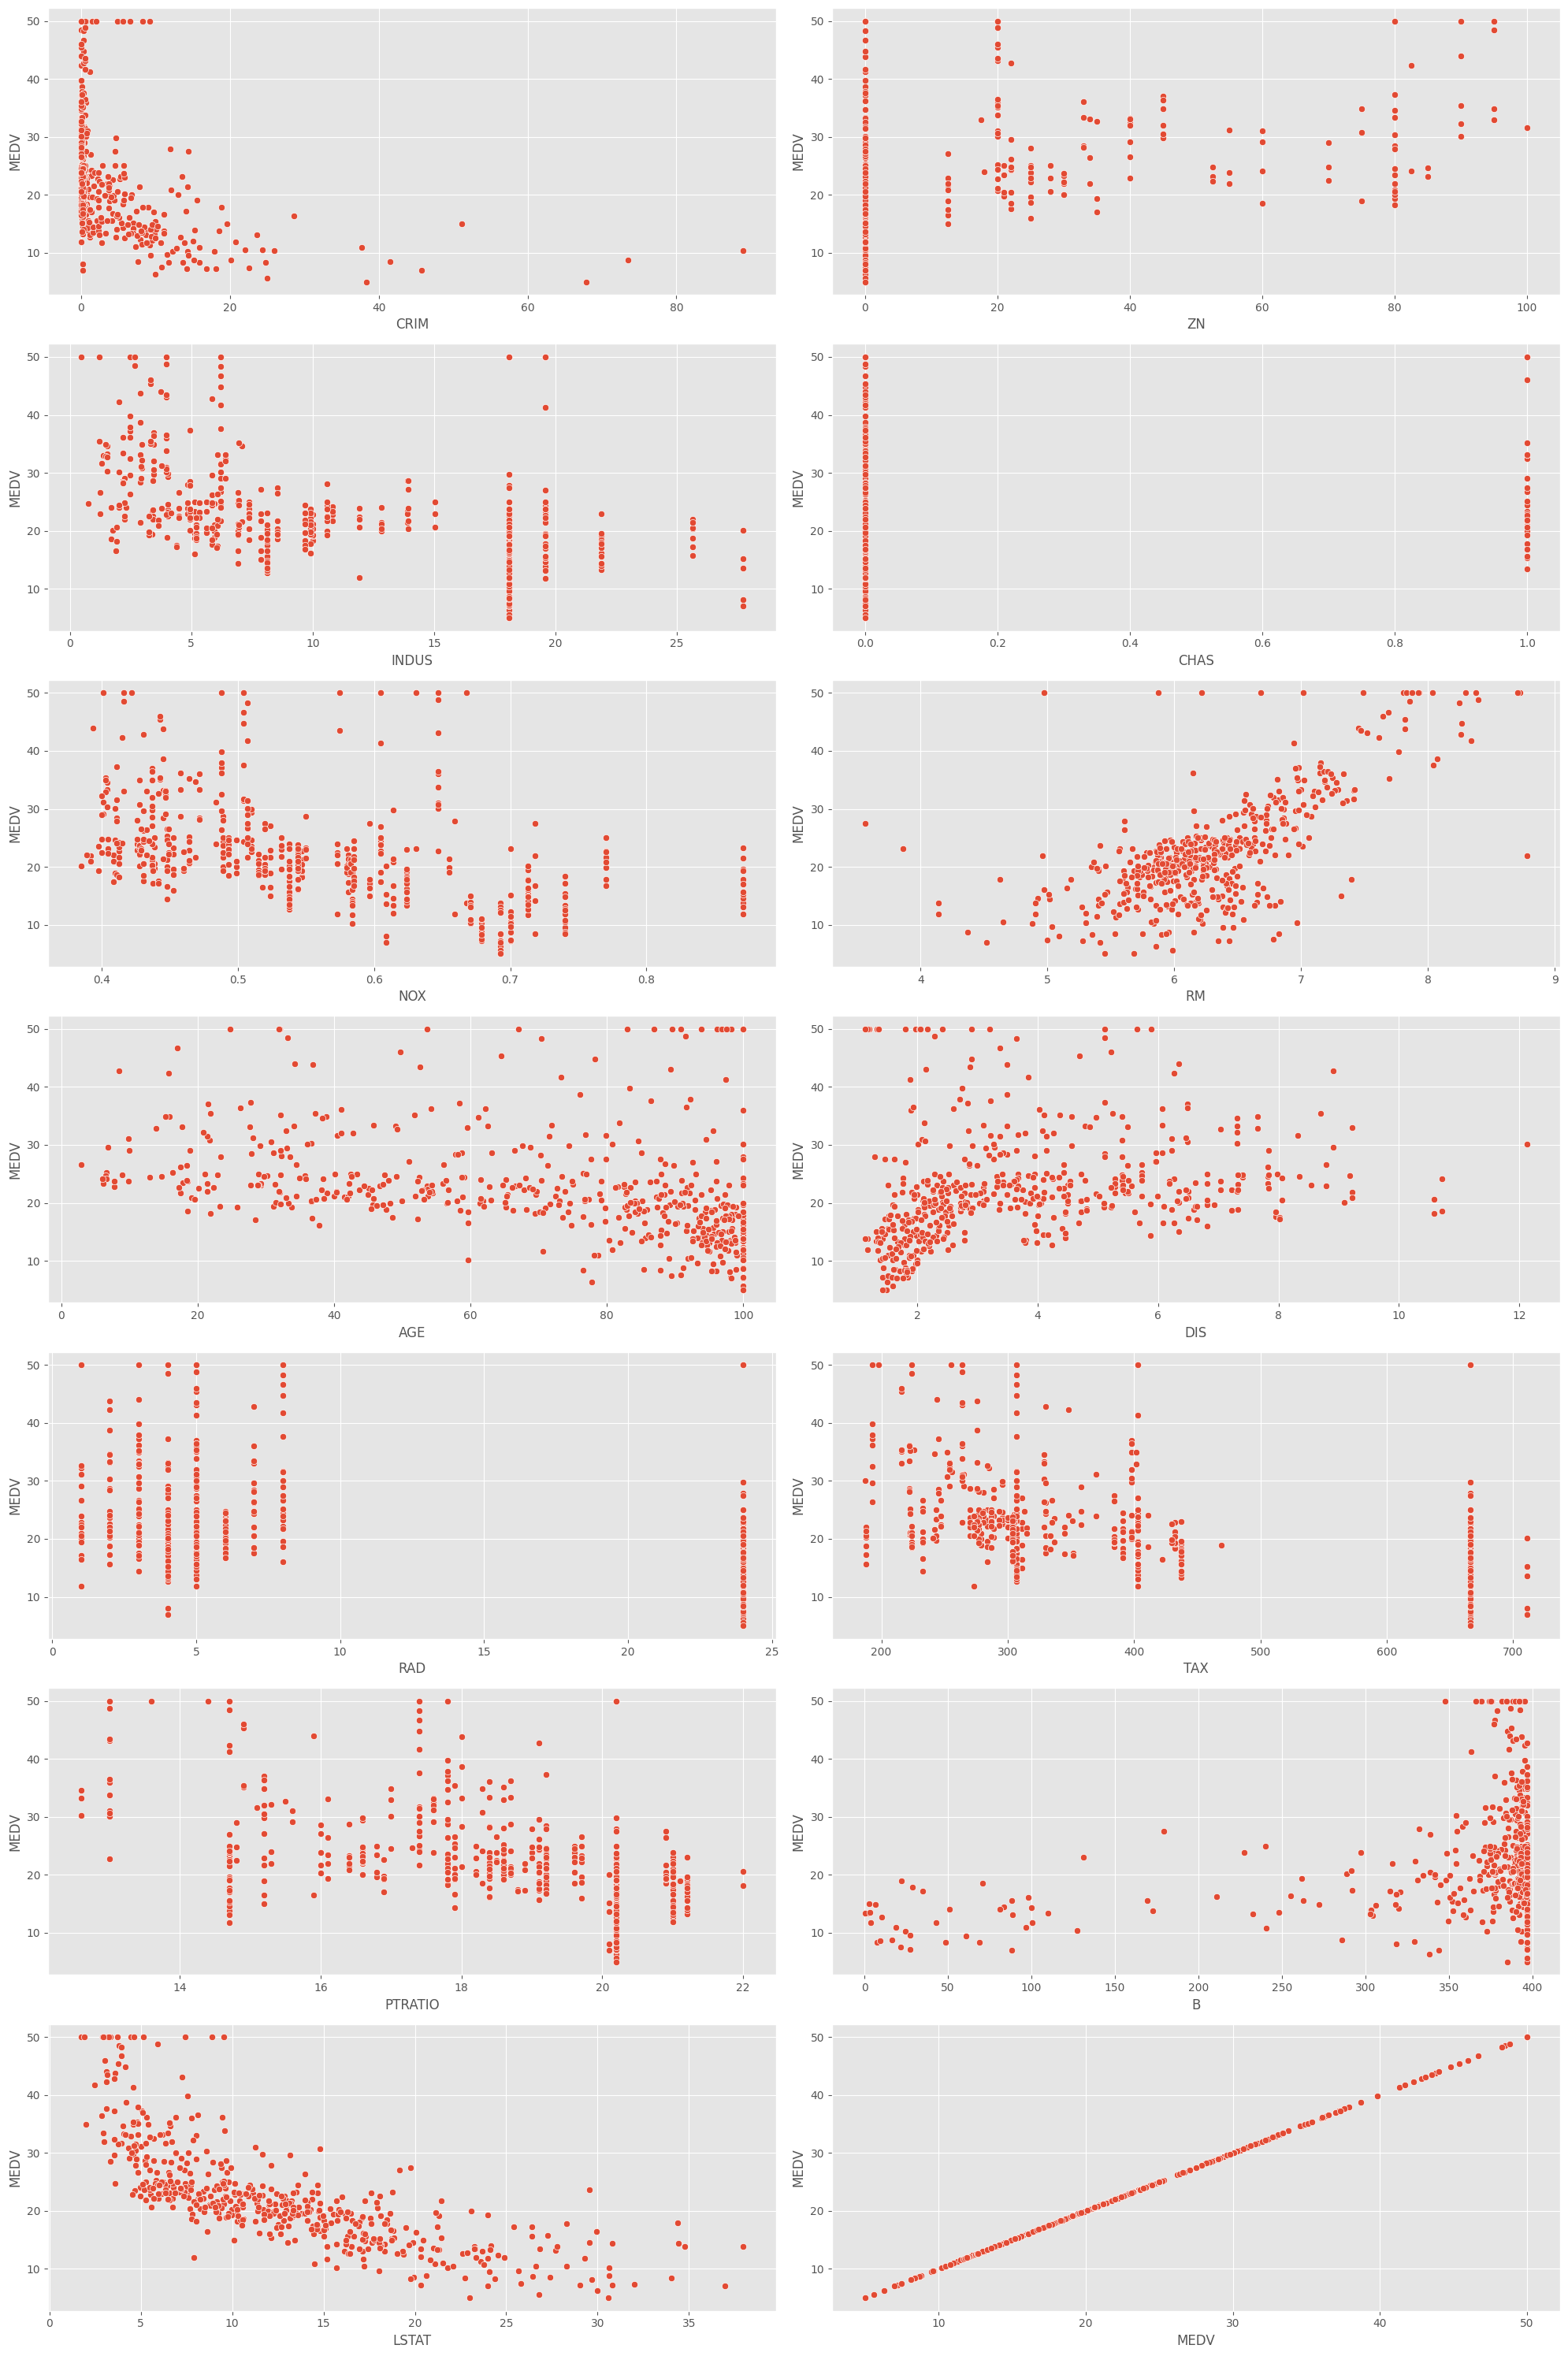

In [10]:
nrows = 7
ncols = 2
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20, 30))
cols = data.columns
index = 0
for i in range(nrows):
    for j in range(ncols):
        sns.scatterplot(x = cols[index], y = 'MEDV', data = data, ax = ax[i, j])
        index += 1
plt.tight_layout()

#### `1` `CRIM`, `ZN`, `INDUS`, `CHAS`, `NOX` , `RAD`, `TAX`, `PTRATIO, `B` no correlation with `MEDV` 'Weak'
#### `2` 'RM' above moderate correlation with `MEDV`   if RM increase the MEDV also increase
#### `3`  `AGE` moderate Correlation with `MEDV` if AGE increase, MEDV decrease, some value of AGE increase the MEDV increase
#### `4` `DIS` some correlation with `MEDV` 'Weak', increase each other
#### `5` `LSTAT` above moderate correlation with `MEDV`, LSTAT increase the MEDV decrease

<Axes: >

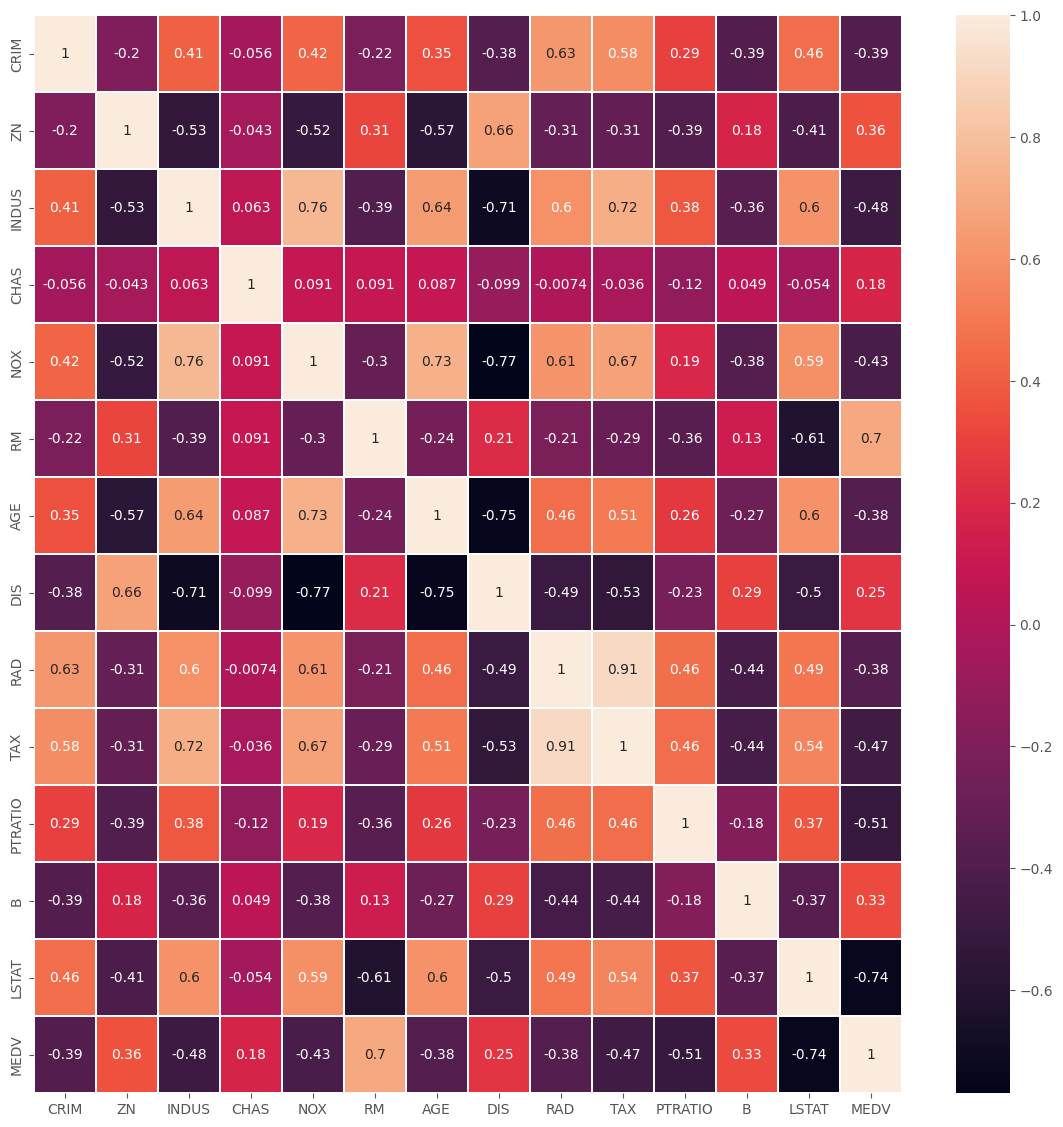

In [11]:
plt.subplots(figsize = (14, 14))
sns.heatmap(data.corr(), annot=True, linewidths=0.2)

In [12]:
corr_matrix = data.corr()
abs(corr_matrix['CRIM']['MEDV']) > 0.5

False

In [13]:
def getCorrelatedFeature(corr_matrix, target = 'MDEV', threshold = 0.5):
    features = []
    corr_value = []
    for col in corr_matrix.index:
      if abs(corr_matrix[col]['MEDV']) > threshold:
        features.append(col)
        corr_value.append(corr_matrix[col]['MEDV'])
    return pd.DataFrame(corr_value, index = features, columns = ['Value'])


In [14]:
corr_data = getCorrelatedFeature(corr_matrix)
corr_data

,Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
MEDV,1.000000


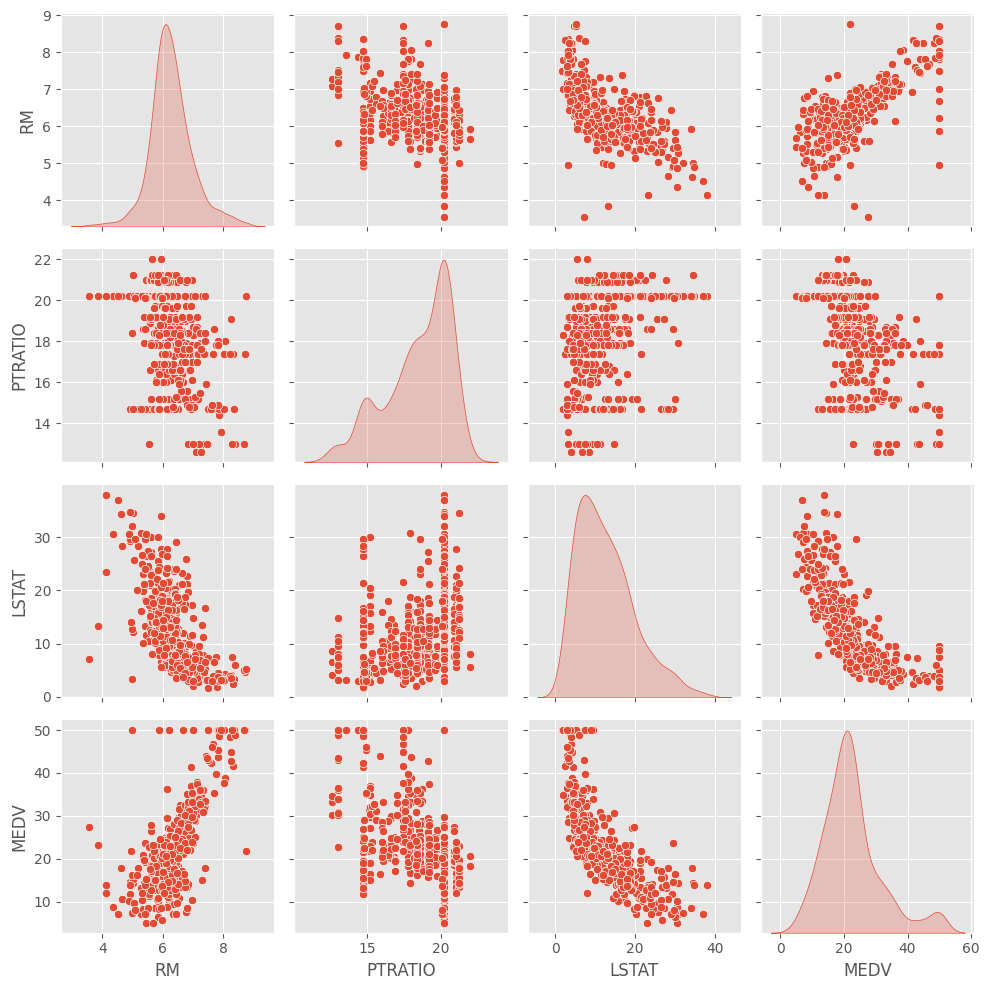

In [15]:
corr_df = data[corr_data.index]
sns.pairplot(corr_df, diag_kind  = 'kde')
plt.tight_layout()

<Axes: >

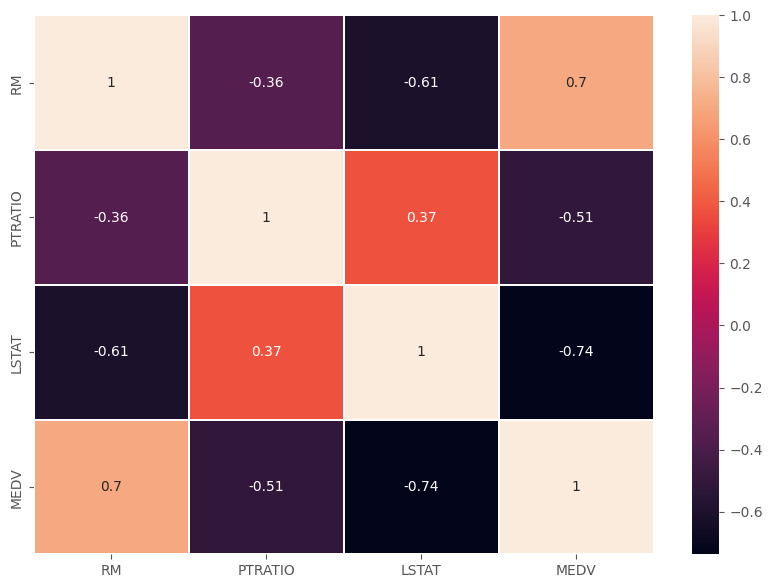

In [16]:
plt.subplots(figsize = (10, 7))
sns.heatmap(corr_df.corr(), annot=True, linewidths=0.2)

## Box Plot

<Axes: xlabel='CHAS', ylabel='MEDV'>

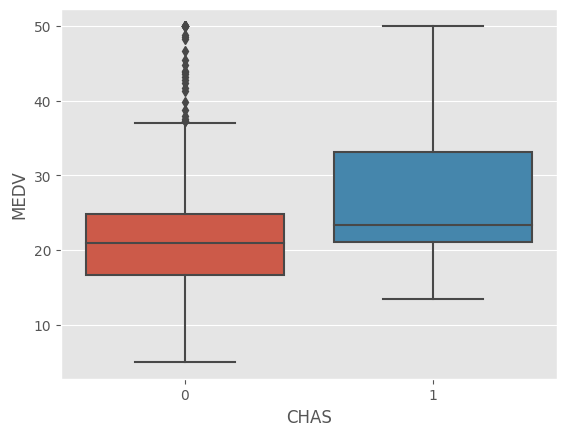

In [17]:
sns.boxplot(x = 'CHAS', y = 'MEDV', data = data)

## Rel Plot

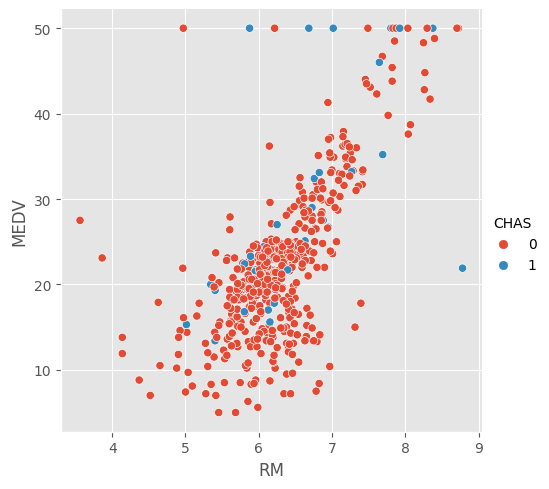

In [18]:
sns.relplot(x = 'RM', y = 'MEDV', hue = 'CHAS', data = data)

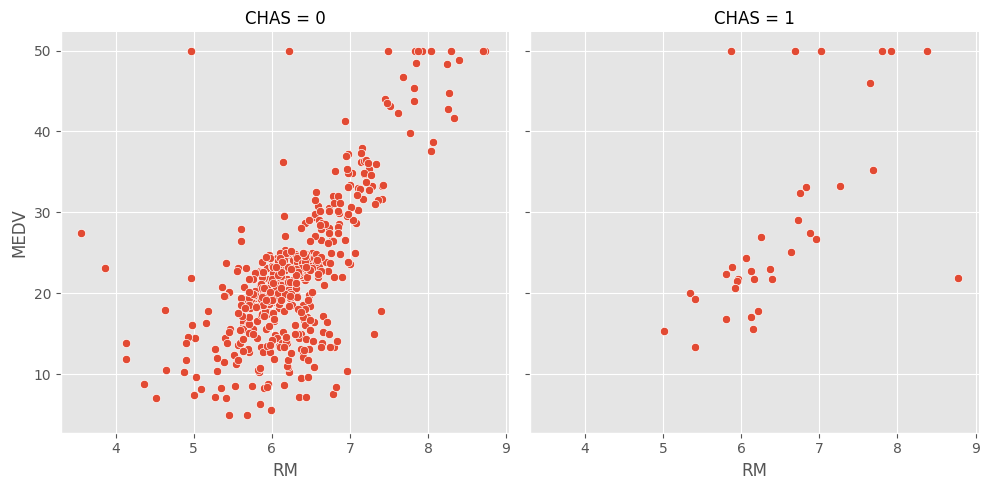

In [19]:
sns.relplot(x = 'RM', y = 'MEDV', col = 'CHAS', data = data)

## Joint Plot

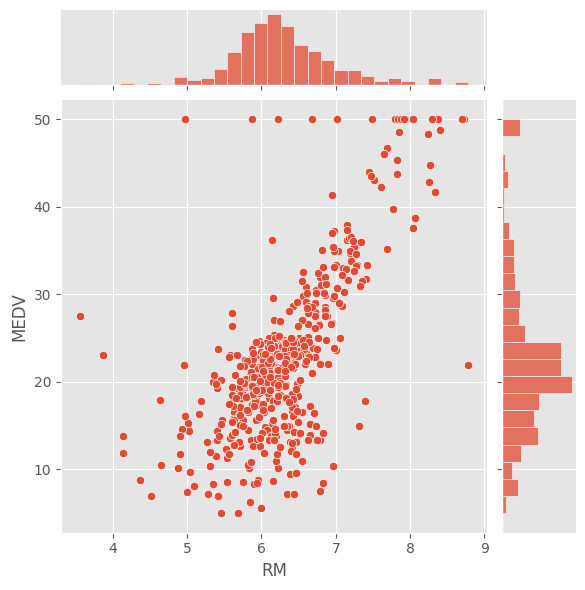

In [20]:
sns.jointplot(x = 'RM', y = 'MEDV', data = data)

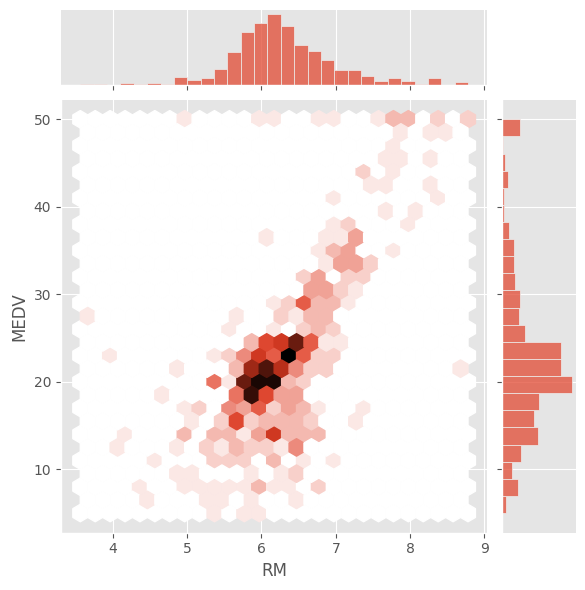

In [21]:
sns.jointplot(x = 'RM', y = 'MEDV', data = data, kind = 'hex')

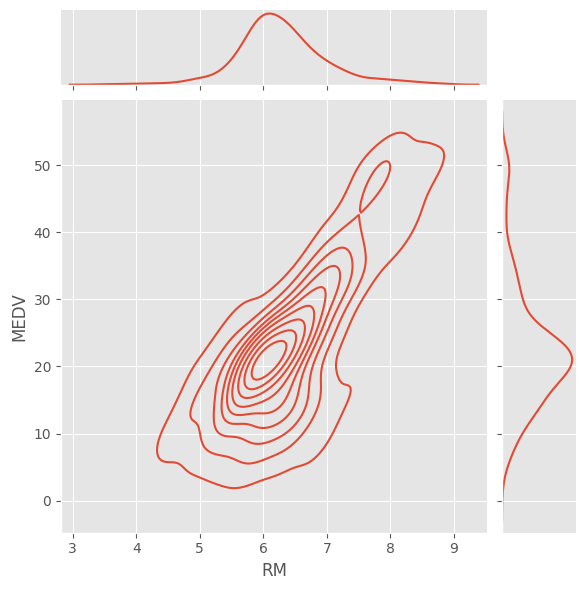

In [22]:
sns.jointplot(x = 'RM', y = 'MEDV', data = data, kind = 'kde')

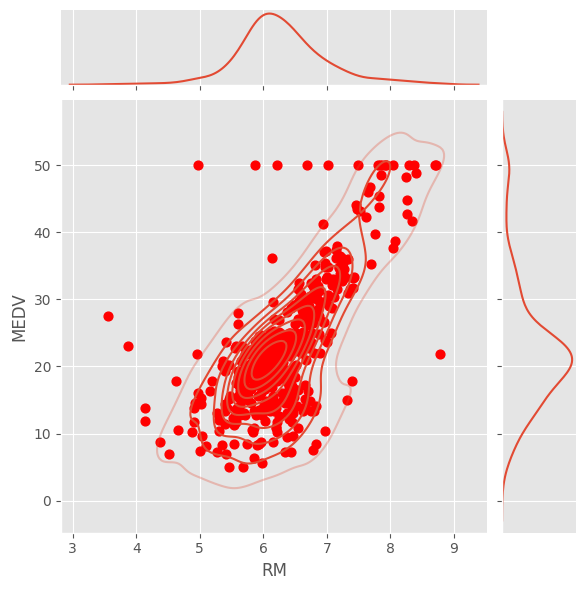

In [23]:
g = sns.jointplot(x = 'RM', y = 'MEDV', data = data, kind = 'kde')
g.plot_joint(plt.scatter, c = 'r', s = 40, linewidth = 1)
g.ax_joint.collections[0].set_alpha(0.3)

## Linear Regression Without ML

<Axes: xlabel='RM', ylabel='MEDV'>

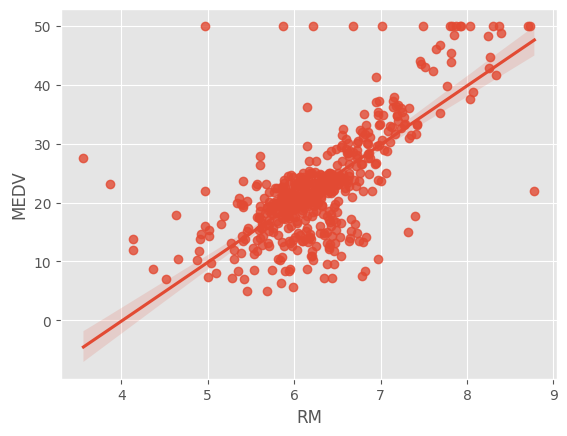

In [24]:
sns.regplot(x = 'RM', y = 'MEDV', data = data, robust=True)

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

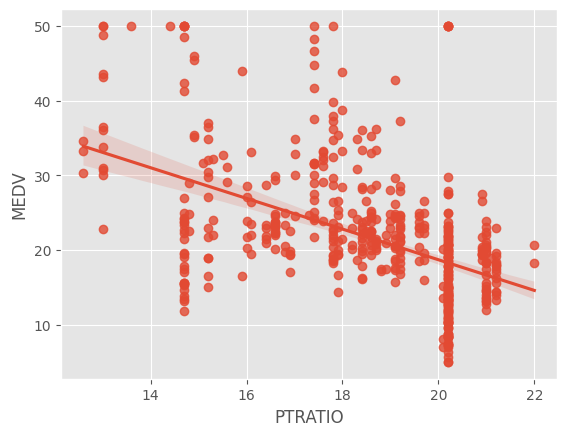

In [25]:
sns.regplot(x = 'PTRATIO', y = 'MEDV', data = data, robust = True)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

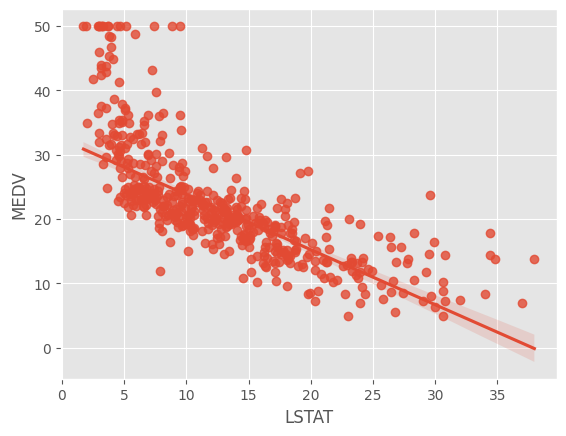

In [26]:
sns.regplot(x = 'LSTAT', y = 'MEDV', data = data, robust = True)

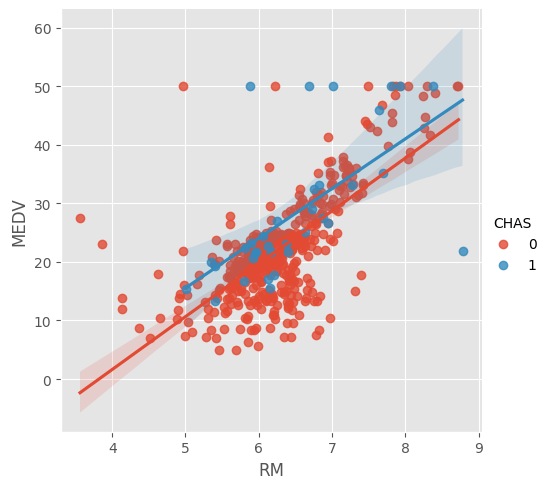

In [27]:
sns.lmplot(x = 'RM', y = 'MEDV', data = data, hue = 'CHAS')

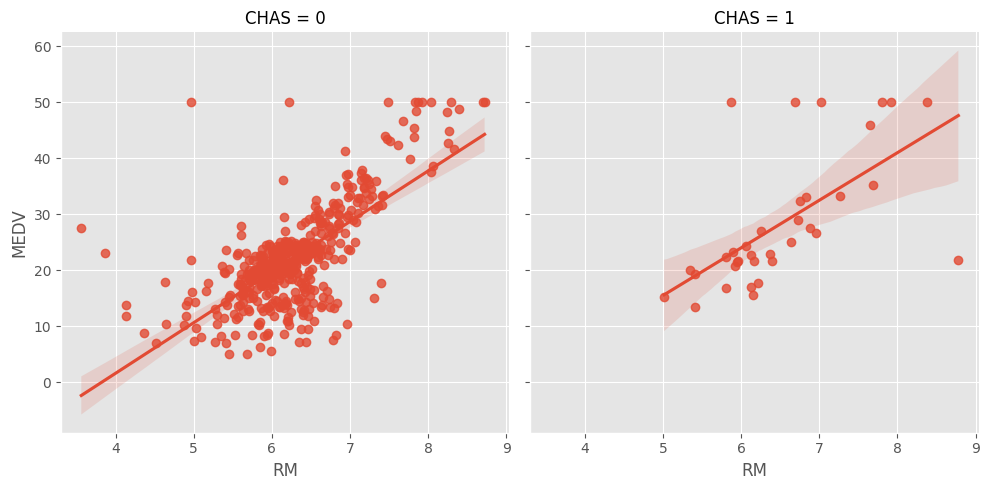

In [28]:
sns.lmplot(x = 'RM', y = 'MEDV', data = data, col = 'CHAS')

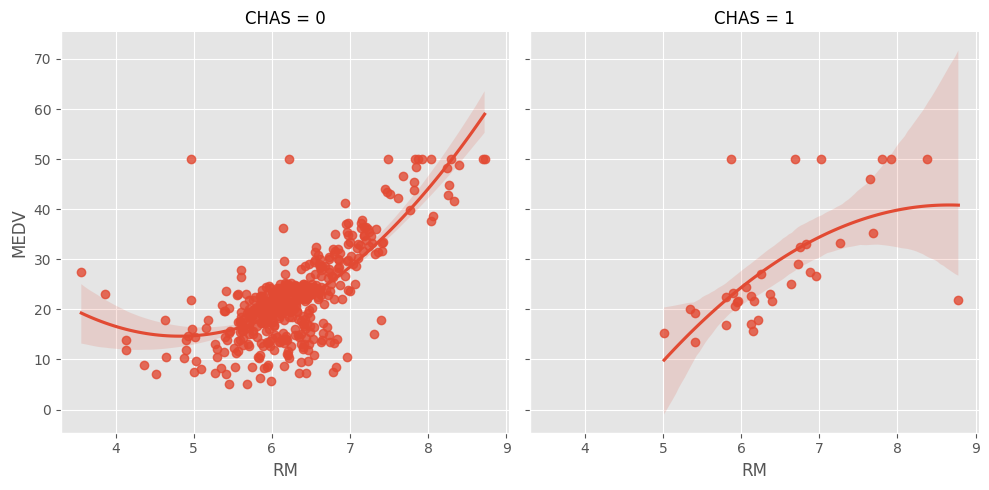

In [29]:
sns.lmplot(x = 'RM', y = 'MEDV', data = data, col = 'CHAS', order = 2)

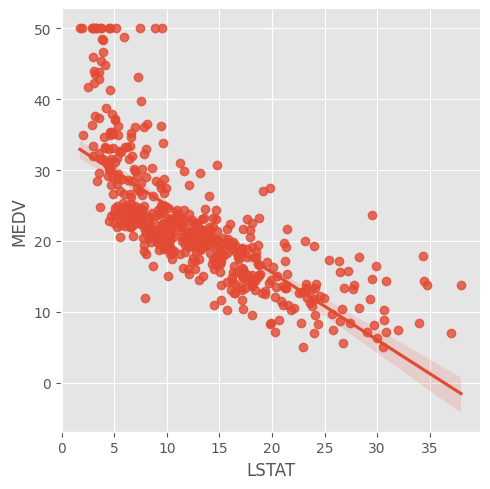

In [30]:
sns.lmplot(x ='LSTAT', y = 'MEDV', data = data)

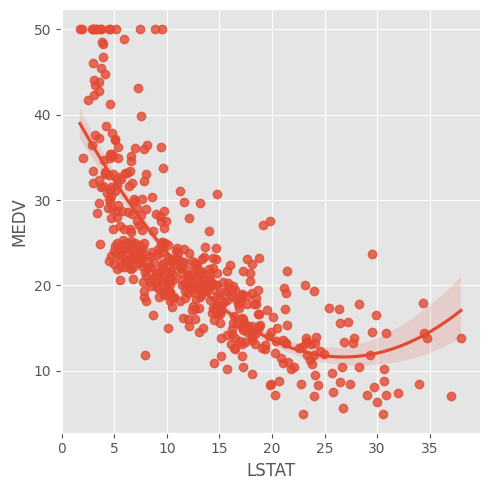

In [31]:
sns.lmplot(x ='LSTAT', y = 'MEDV', data = data, order = 2)

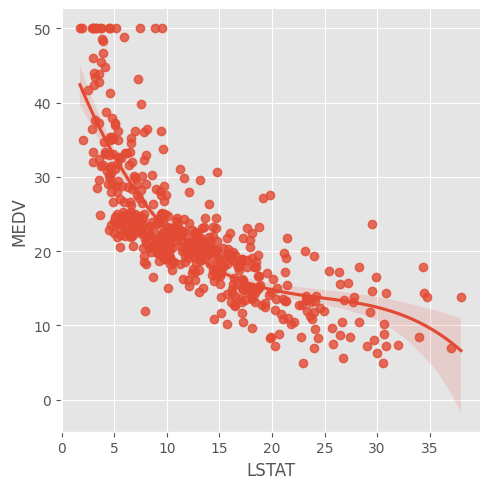

In [32]:
sns.lmplot(x ='LSTAT', y = 'MEDV', data = data, order = 3)